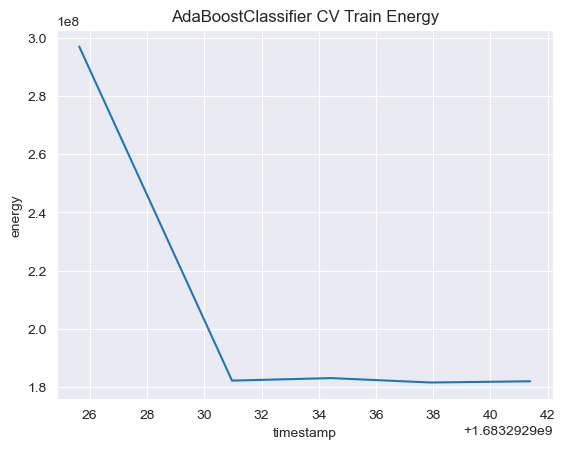

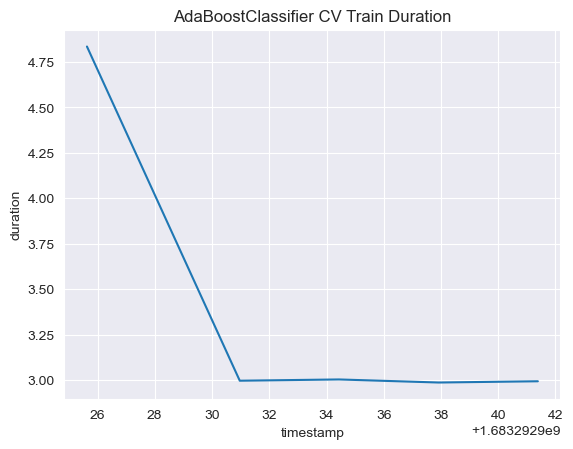

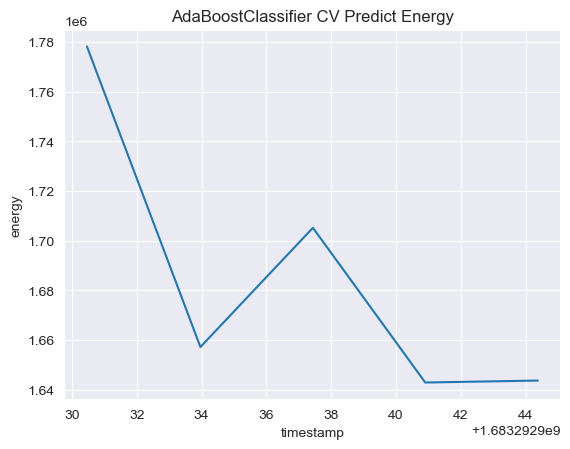

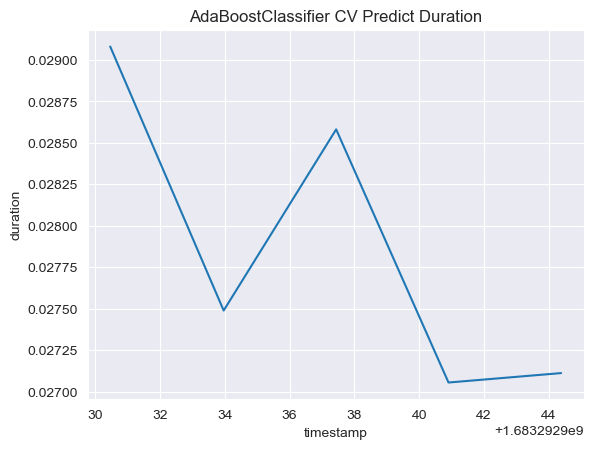

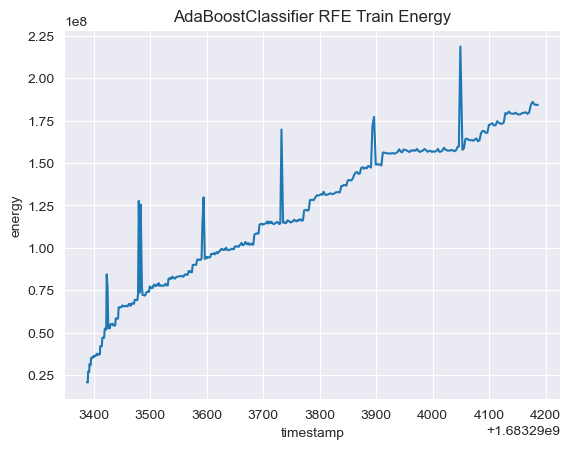

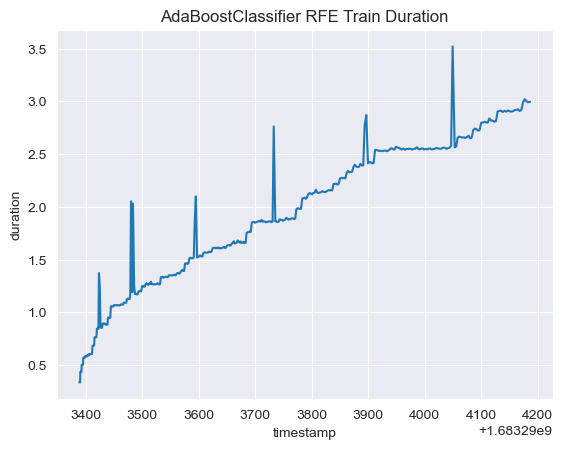

,Unnamed: 0,tag,duration,energy
timestamp,,,,
1.683293e+09,0,AdaBoostClassifier_train_node_context_switches...,0.339502,20851216.0
1.683293e+09,3,AdaBoostClassifier_train_node_context_switches...,0.339105,20852498.0
1.683293e+09,6,AdaBoostClassifier_train_node_context_switches...,0.337906,20736003.0
1.683293e+09,9,AdaBoostClassifier_train_node_context_switches...,0.335076,20603655.0
1.683293e+09,12,AdaBoostClassifier_train_node_context_switches...,0.335896,20610812.0
...,...,...,...,...
1.683294e+09,1320,AdaBoostClassifier_train_node_vmstat_pgpgout_1...,2.992862,184196377.0
1.683294e+09,1323,AdaBoostClassifier_train_node_vmstat_pgpgout_1...,3.020753,186017525.0
1.683294e+09,1326,AdaBoostClassifier_train_node_vmstat_pgpgout_1...,2.998380,184549522.0


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_power_measurements(
        model,
        exp_id,
        core_directory='/Users/gabriel/Dropbox/Research/Serrano/Experiments/Results/Energy'
):
    #
    model_dir = os.path.join(core_directory, exp_id+"/models")
# 'Model_AdaBoostClassifier_ada_exp_iteration_0_cv_power_report.csv'
    # Plot CV
    df_cv = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_iteration_0_cv_power_report.csv'), index_col='timestamp')
    df_cv_train = df_cv[df_cv['tag'].str.contains('train')]
    df_cv_predict = df_cv[df_cv['tag'].str.contains('predict')]

    sns.lineplot(data=df_cv_train, x='timestamp', y='energy').set(title=f'{model} CV Train Energy')
    plt.show()
    sns.lineplot(data=df_cv_train, x='timestamp', y='duration').set(title=f'{model} CV Train Duration')
    plt.show()

    sns.lineplot(data=df_cv_predict, x='timestamp', y='energy').set(title=f'{model} CV Predict Energy')
    plt.show()
    sns.lineplot(data=df_cv_predict, x='timestamp', y='duration').set(title=f'{model} CV Predict Duration')
    plt.show()
    # Plot RFE
    df_rfe = pd.read_csv(os.path.join(model_dir, 'Model_'+model+'_'+exp_id+'_rfe_power_report.csv'), index_col='timestamp')

    df_rfe_train = df_rfe[df_rfe['tag'].str.contains(f'{model}_train')]
    # Filtering negative values
    sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='energy').set(title=f'{model} RFE Train Energy')
    plt.show()

    sns.lineplot(data=df_rfe_train[~(df_rfe_train['energy'] < 0)], x='timestamp', y='duration').set(title=f'{model} RFE Train Duration')
    plt.show()

    return df_rfe_train

plot_power_measurements('AdaBoostClassifier', 'ada_exp')
